<a href="https://colab.research.google.com/github/chaitanya-kh/FashionMNIST/blob/master/FashionMNIST_with_BatchNorm_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST image recognition using CNN

##Introduction

Following is covered in this Notebook



*   Download the Fashion MNIST from keras
*   Check the data and pre-process the data
*   Build Keras model with Batch normalization
*   Build Keras model without Batch normalization
*   Compare the loss/accuracy curve with and without Batch normalization
*   Visualize the predictions



In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
print (tf.__version__)

1.14.0


## Download Fashion MNIST

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
#Defining class names for labels (from https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Check and pre-process the data

In [5]:
print (type(train_images))
print (type(train_labels))
print (train_images.shape)
print (train_labels.shape)
print (test_images.shape)
print (test_labels.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


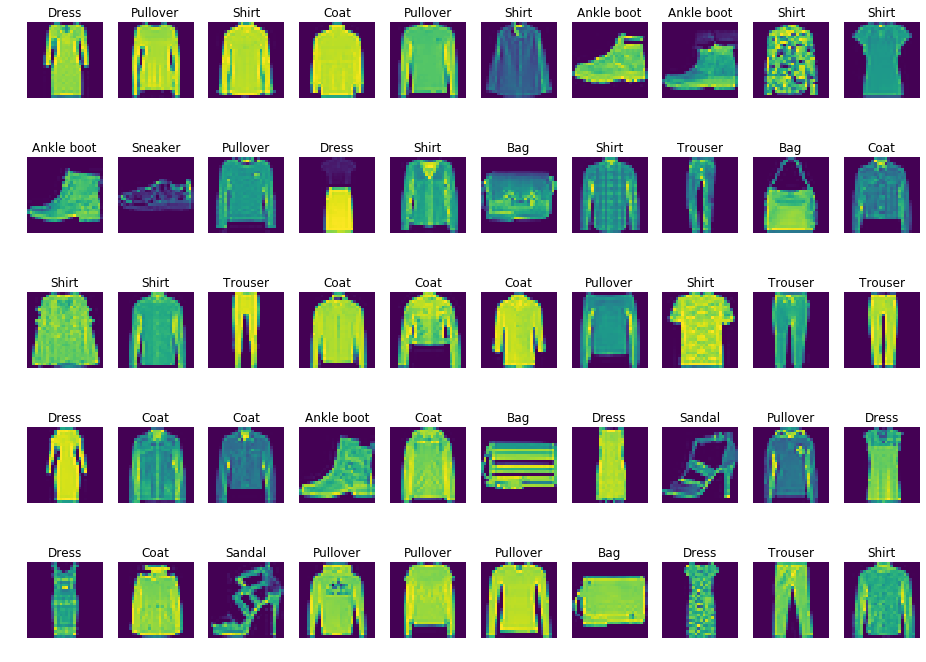

In [6]:
#Randomly plot 50 images
n = np.random.randint(0, len(train_labels), size=(50,))

f, ax = plt.subplots(5, 10, figsize=(16, 12))
for i in range(len(n)):
  ax[i//10, i%10].imshow(train_images[n[i]])
  ax[i//10, i%10].set_title(class_names[train_labels[n[i]]])
  ax[i//10, i%10].axis('off')


Other things to look at in the data are:


1.   Distribution of each class within training and test set 
2.   Display sample images per class

[Skipping this assuming data should be fine]



In [0]:
#Data preprocessing
X_train = train_images/255.0
X_train = X_train.reshape(-1, 28, 28, 1)

X_test = test_images/255.0
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = keras.utils.to_categorical(train_labels, len(class_names))

y_test = keras.utils.to_categorical(test_labels, len(class_names))

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5786930192242829214
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3610026965410475446
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16401827951346573511
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14892338381
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16226407556543153727
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [9]:
tf.Session(config=tf.ConfigProto(log_device_placement=True))

## Keras Model with Batch Normalization

Lets build the Keras model with Batch normalization which is somewhat similar to Alexnet with less layers :


*   Layer1: Convolution with Batch Normalization and RELU
*   Layer2: Max pool with dropout rate of 20%
*   Layer3: Convolution with Batch Normalization and RELU
*   Layer4: Convolution with Batch Normalization and RELU
*   Layer5: Convolution with Batch Normalization and RELU
*   Layer6: Max pool with dropout rate of 40%
*   Layer7: Flatten
*   Layer8: Fully connected with batch normalization, relu and dropout rate of 10%
*   Layer9: output layer with softmax activation for categorical output




Note1: Bias is not required when batch normalization is used because batch normalization itself has a bias term. Formula to calculate batch normalization is: (scale * normalized(x) + offset) where offset acts as bias. Removing bias from conv/dense layers saves computation time


Note2: For all the layers, using 'he_normal' initializer for kernel weights and using Adam optimizer for faster convergence.


Note3: Using much higher learning rate of 0.01 due to batch normalization




In [10]:
#Implementing Dense model in keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation


Using TensorFlow backend.


### Build the model

In [11]:
#Model with batch normalization
keras.backend.clear_session()
tf.reset_default_graph()

model = Sequential()

#Layer1: Convolution with Batch Normalization and RELU
model.add(Conv2D(filters=30, kernel_size=(3,3), strides=1, kernel_initializer='he_normal', input_shape=(28, 28, 1), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Layer2: Max pool with dropout rate of 20%
model.add(MaxPooling2D((2,2), (2,2)))
model.add(Dropout(rate=0.2))

#Layer3: Convolution with Batch Normalization and RELU
model.add(Conv2D(filters=60, kernel_size=(3,3), strides=1, kernel_initializer='he_normal', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Layer4: Convolution with Batch Normalization and RELU
model.add(Conv2D(filters=90, kernel_size=(3,3), strides=1, kernel_initializer='he_normal', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Layer5: Convolution with Batch Normalization and RELU
model.add(Conv2D(filters=120, kernel_size=(3,3), strides=1, kernel_initializer='he_normal', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Layer6: Max pool with dropout rate of 40%
model.add(MaxPooling2D((2,2), (2,2)))
model.add(Dropout(rate=0.4))

#Layer7: Flatten
model.add(Flatten())

#Layer8: Fully connected with batch normalization, relu and dropout rate of 10%
model.add(Dense(units=120, kernel_initializer='he_normal', use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=0.1))

#Layer9: output layer with softmax activation for categorical output
model.add(Dense(len(class_names), kernel_initializer='he_normal', activation='softmax', ))

#Compile the model with higher learning rate
opt = tf.train.AdamOptimizer(learning_rate=0.01)
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=opt, 
              metrics=['accuracy'])

model.summary()

W0702 18:31:08.498104 140358089607040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 18:31:08.500997 140358089607040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 18:31:08.505828 140358089607040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0702 18:31:08.529292 140358089607040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 18:31:08.530252

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 30)        270       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 30)        120       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 60)        16200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 60)        240       
__________

### Train the Model

In [0]:
history = model.fit(X_train, y_train,
                  batch_size=100,
                  epochs=25,
                  verbose=0)

In [13]:
#Training set loss and accuracy
train_score = model.evaluate(X_train, y_train)
print (train_score)

60000/60000 [==============================] - 5s 81us/step
[0.10688174032320578, 0.9599166666666666]


### Predict and evaluate test set

In [14]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 82us/step


In [15]:
#Test loss and Test accuracy
print (score)

[0.24586067527532576, 0.9187]


In [16]:
#Correct and Wrong predictions in test set
pred_test_labels = np.argmax(y_pred, axis=1)
correct_predictions = [int(pred_test_labels[i] == test_labels[i]) for i in range(len(test_labels))]
print ('Correct predictions: ', correct_predictions.count(1))
print ('Incorrect predictions: ', correct_predictions.count(0))

Correct predictions:  9187
Incorrect predictions:  813


In [17]:
#All other metrics
from sklearn.metrics import classification_report
print (classification_report(test_labels, pred_test_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.87      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.94      0.81      0.87      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.79      0.95      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.79      0.74      0.76      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Keras model without Batch Normalization

Lets build the Keras model with Batch normalization which is somewhat similar to Alexnet with less layers :


*   Layer1: Convolution and RELU
*   Layer2: Max pool with dropout rate of 20%
*   Layer3: Convolution and RELU
*   Layer4: Convolution and RELU
*   Layer5: Convolution and RELU
*   Layer6: Max pool with dropout rate of 40%
*   Layer7: Flatten
*   Layer8: Fully connected with relu and dropout rate of 10%
*   Layer9: output layer with softmax activation for categorical output




Note1: For all the layers, using 'he_normal' initializer for kernel weights and using Adam optimizer for faster convergence.


### Build the model

In [18]:

model1 = Sequential()

#Layer1: Convolution and RELU
model1.add(Conv2D(filters=30, kernel_size=(3,3), strides=1, activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))

#Layer2: Max pool with dropout rate of 20%
model1.add(MaxPooling2D((2,2), (2,2)))
model1.add(Dropout(rate=0.2))

#Layer3: Convolution and RELU
model1.add(Conv2D(filters=60, kernel_size=(3,3), strides=1, activation='relu', kernel_initializer='he_normal'))

#Layer4: Convolution and RELU
model1.add(Conv2D(filters=90, kernel_size=(3,3), strides=1, activation='relu', kernel_initializer='he_normal'))

#Layer5: Convolution and RELU
model1.add(Conv2D(filters=120, kernel_size=(3,3), strides=1, activation='relu', kernel_initializer='he_normal'))

#Layer6: Max pool with dropout rate of 40%
model1.add(MaxPooling2D((2,2), (2,2)))
model1.add(Dropout(rate=0.4))

#Layer7: Flatten
model1.add(Flatten())

#Layer8: Fully connected with relu and dropout rate of 10%
model1.add(Dense(units=120, kernel_initializer='he_normal'))
model1.add(Dropout(rate=0.1))

#Layer9: output layer with softmax activation for categorical output
model1.add(Dense(len(class_names), kernel_initializer='he_normal', activation='softmax', ))

#Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 60)        16260     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 90)          48690     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 120)         97320     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 120)         0         
__________

### Train the model

In [19]:
history1 = model1.fit(X_train, y_train,
                  batch_size=100,
                  epochs=25,
                  verbose=0)

W0702 18:33:31.398324 140358089607040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
#Training set loss and accuracy
train_score1 = model1.evaluate(X_train, y_train)
print (train_score1)

60000/60000 [==============================] - 4s 66us/step
[0.09598212225784858, 0.96565]


### Predict and evaluate test set

In [21]:
y_pred1 = model1.predict(X_test)
score1 = model1.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 71us/step


In [22]:
#Test loss and Test accuracy
print (score1)

[0.2663928079426289, 0.914]


In [23]:
#Correct and wrong predictions in test set
pred_test_labels1 = np.argmax(y_pred1, axis=1)
correct_predictions1 = [int(pred_test_labels1[i] == test_labels[i]) for i in range(len(test_labels))]
print ('Correct predictions: ', correct_predictions1.count(1))
print ('Incorrect predictions: ', correct_predictions1.count(0))

Correct predictions:  9140
Incorrect predictions:  860


In [24]:
#All other metrics
from sklearn.metrics import classification_report
print (classification_report(test_labels, pred_test_labels1, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.90      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.89      0.85      0.87      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.88      0.85      0.87      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.73      0.76      0.74      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



## Compare accuracy/loss per epoch with and without batch normalization

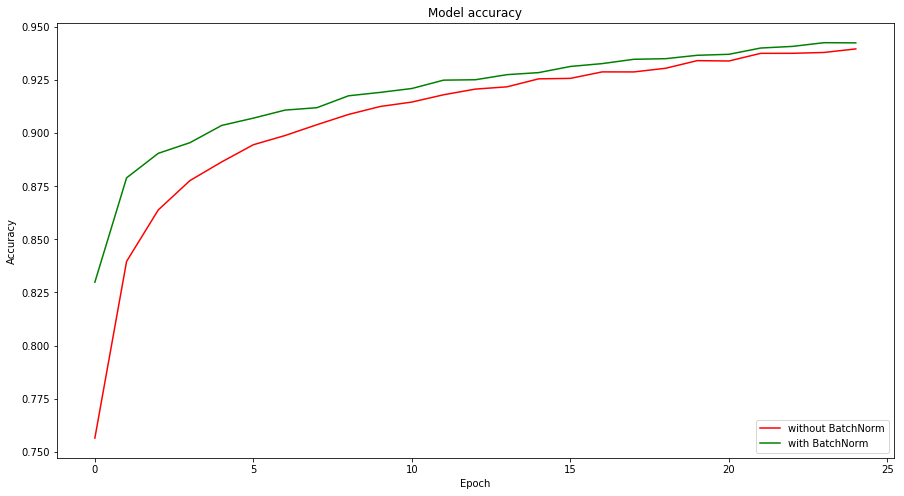

In [25]:
#Plot model accuracy of both the models
plt.figure(figsize=(15,8))
plt.plot(history1.history['acc'], color='red')
plt.plot(history.history['acc'], color='green')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(labels=['without BatchNorm', 'with BatchNorm'], loc='lower right', )
plt.show()

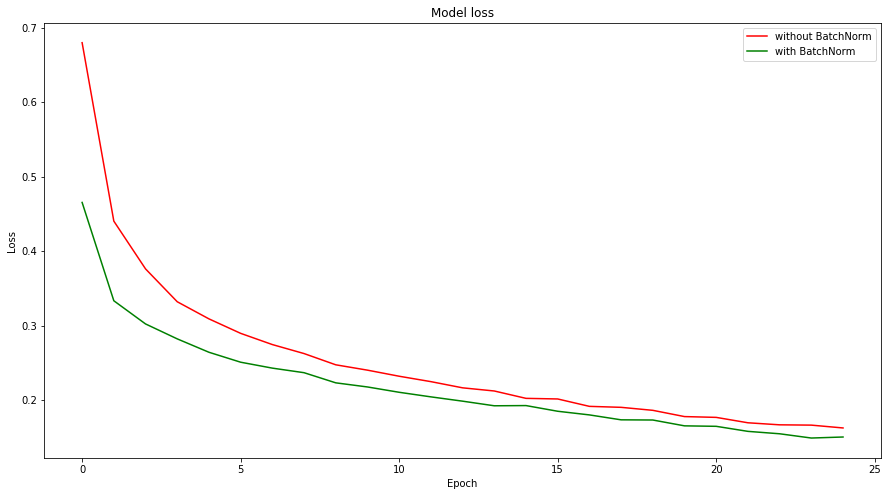

In [26]:
#Plot loss per epoch for both the models
plt.figure(figsize=(15,8))
plt.plot(history1.history['loss'], color='red')
plt.plot(history.history['loss'], color='green')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(labels=['without BatchNorm', 'with BatchNorm'], loc='upper right', )
plt.show()

From the above plots, it is evident that using Batch normalization helps to gain higher accuracy in lesser epochs

In [0]:
#Check how many correct predictions are same in both the models
both_correct = np.array([int((correct_predictions1[i] == 1) and (correct_predictions[i] == 1)) for i in range(len(pred_test_labels))])
both_wrong = np.array([int((correct_predictions1[i] == 0) and (correct_predictions[i] == 0)) for i in range(len(correct_predictions))])
only_bn_correct = np.array([int((correct_predictions1[i] == 0) and (correct_predictions[i] == 1)) for i in range(len(correct_predictions))])
only_no_bn_correct = np.array([int((correct_predictions1[i] == 1) and (correct_predictions[i] == 0)) for i in range(len(correct_predictions))])


In [28]:
print ('Correct predictions in both the models: ', both_correct.tolist().count(1))
print ('Wrong predictions in both the models: ', both_wrong.tolist().count(1))
print ('Correct predictions only in model with BN but not in non BN: ', only_bn_correct.tolist().count(1))
print ('Correct predictions only in model with non BN but not in BN: ', only_no_bn_correct.tolist().count(1))

Correct predictions in both the models:  8828
Wrong predictions in both the models:  501
Correct predictions only in model with BN but not in non BN:  359
Correct predictions only in model with non BN but not in BN:  312


## Visualize the predictions

In [0]:
#Helper function for plotting
def draw_preds(pred_arr, num_rows=4, num_cols=4):
  #num_rows = 4
  #num_cols = 4
  num_images = num_rows*num_cols

  a = np.where(pred_arr == 1)[0]
  n = np.random.randint(0, len(a), size=(num_images,))
  #a.shape

  f, ax = plt.subplots(num_rows, num_cols, figsize=(num_cols*4, num_rows*5))

  for i in range(num_rows):
    for j in range(num_cols):
      idx = a[n[i+j]]
      #print (i, '//', num_rows, '=', i//num_rows, ' ', i, '%', num_cols, '=', i%num_cols)
      #print (i, ' ', idx, ' ', pred_test_labels[idx], ' ', pred_test_labels1[idx], ' ', test_labels[idx])
      ax[i, j].imshow(test_images[idx])
      ax[i, j].set_title('True:'+class_names[test_labels[idx]]+'\nBN:'+class_names[pred_test_labels[idx]]+'\nnon BN:'+class_names[pred_test_labels1[idx]])
      ax[i, j].axis('off')
    


### Correct predictions from both the models

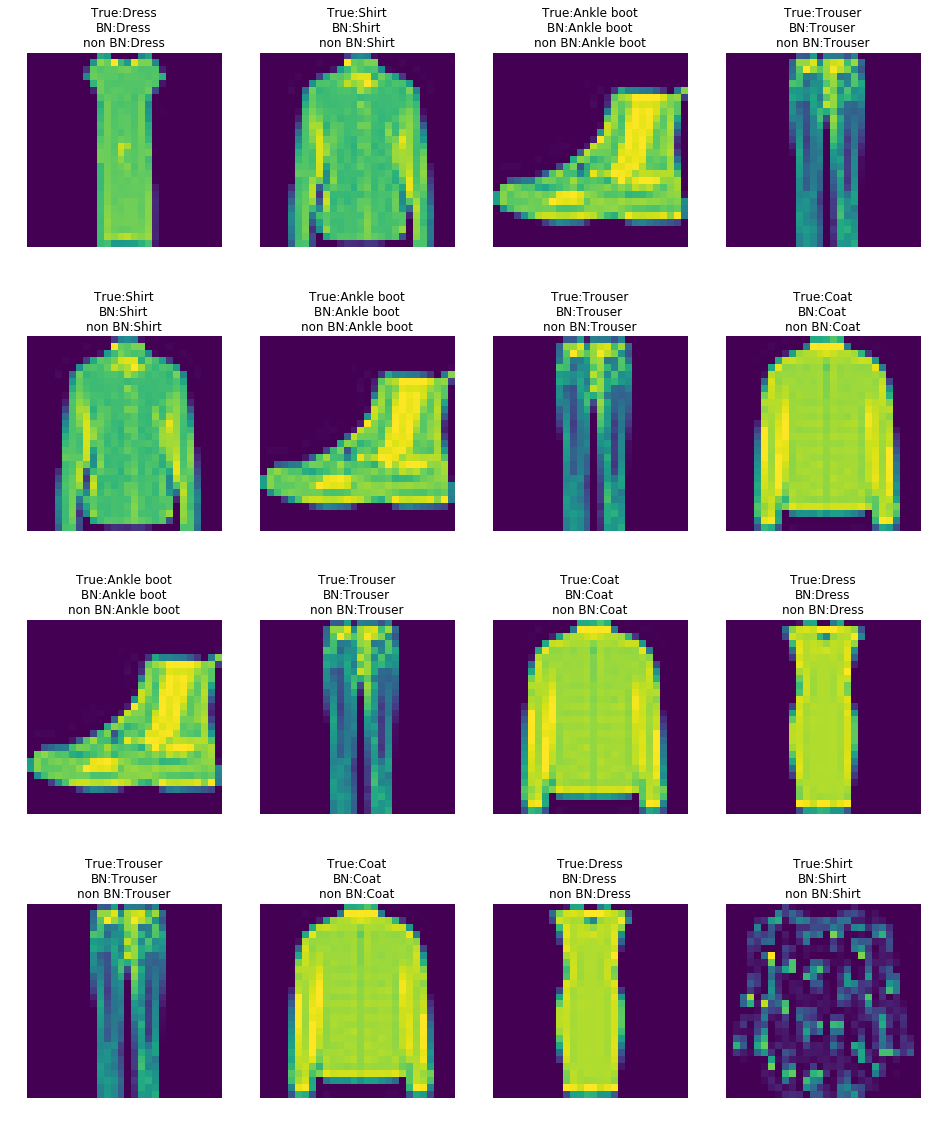

In [30]:
#Lets check some random correct predictions from both the models
draw_preds(both_correct, 4, 4)

### Wrong predictions from both the models

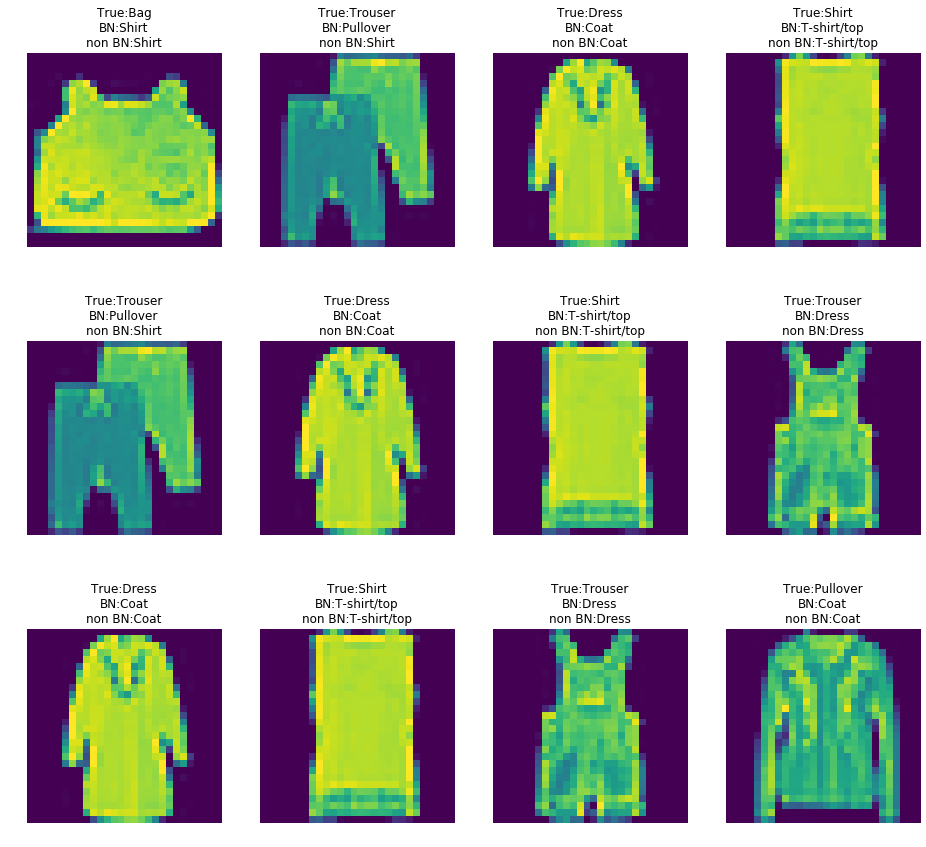

In [31]:
#Lets check some random wrong predictions from both the models
draw_preds(both_wrong, 3, 4)

### Correct predictions from BN model which were wrongly predicted by non BN model

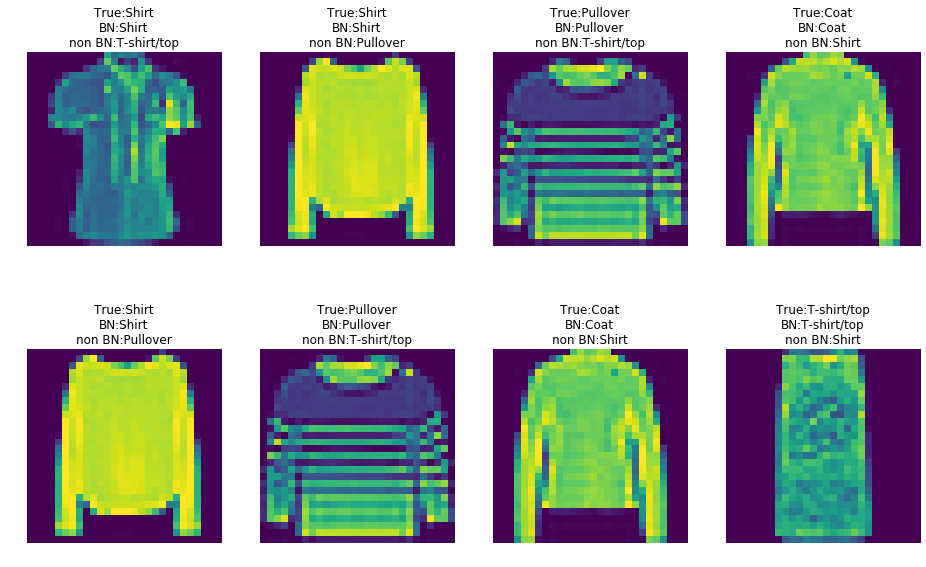

In [32]:
#Lets check some random predictions which were correct in BN model and wrong in non BN model
draw_preds(only_bn_correct, 2, 4)

### Correct predictions from non BN model which were wrongly predicted by BN model

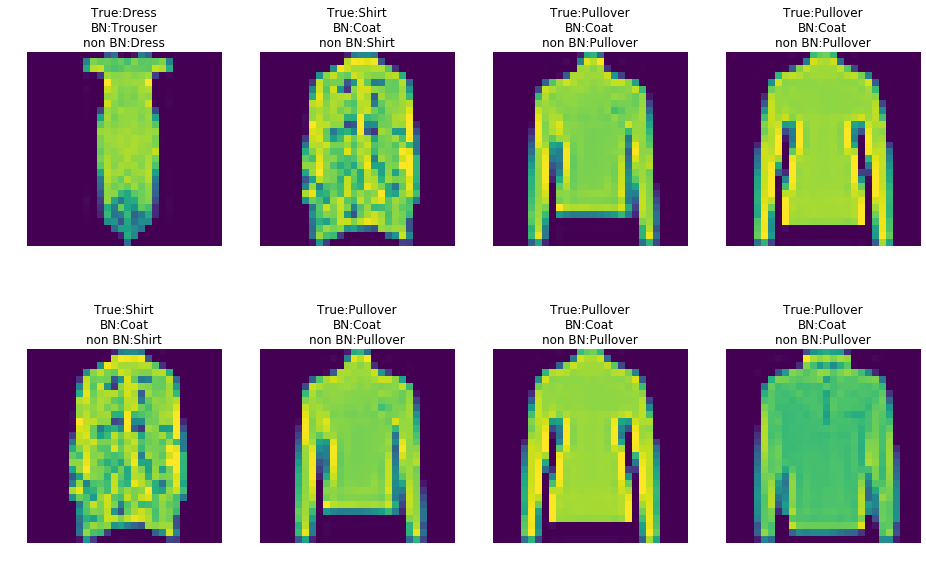

In [33]:
#Lets check some random predictions which were correct in non BN model and wrong in BN model
draw_preds(only_no_bn_correct, 2, 4)